# How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [9]:
# Importing necessary libraries for data manipulation, visualization, and machine learning
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset from a CSV file into a pandas DataFrame
crops = pd.read_csv("soil_measures.csv")

# Display the first few rows of the dataset to understand its structure
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


This cell imports necessary libraries and loads a dataset named `soil_measures.csv` into a DataFrame called `crops`. It then displays the first few rows of this DataFrame.

## EDA
This following cell provides an overview of the DataFrame, including the number of non-null values in each column and the data types.


In [10]:
# Display detailed information about the DataFrame, including the data types and non-null values
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [11]:
# Display the dimensions of the DataFrame (number of rows and columns)
crops.shape

(2200, 5)

This cell calculates and prints the unique crop types and the total number of different crops present in the dataset

In [12]:
# Display unique crop types in the dataset and count the number of unique crops
unique_crops = crops["crop"].unique()
number_of_unique_crops = crops["crop"].nunique()

# Output: Displays unique crop types and their count
print("Unique Crops:", unique_crops)
print("Number of Unique Crops:", number_of_unique_crops)

Unique Crops: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Number of Unique Crops: 22


This cell provides a statistical summary of the dataset, including count, mean, standard deviation, minimum, and maximum values for each column.

In [13]:
# Generate a statistical summary of the dataset, including mean, standard deviation, min, and max values for each column
statistical_summary = crops.describe()

# Output: Displays the statistical summary of the dataset
print(statistical_summary)

                 N            P            K           ph
count  2200.000000  2200.000000  2200.000000  2200.000000
mean     50.551818    53.362727    48.149091     6.469480
std      36.917334    32.985883    50.647931     0.773938
min       0.000000     5.000000     5.000000     3.504752
25%      21.000000    28.000000    20.000000     5.971693
50%      37.000000    51.000000    32.000000     6.425045
75%      84.250000    68.000000    49.000000     6.923643
max     140.000000   145.000000   205.000000     9.935091


In [14]:
# Check for missing values in each column of the dataset
missing_values = crops.isna().sum()

# Count the occurrences of each crop type in the dataset
crop_counts = crops["crop"].value_counts()

# Output: Displays the count of missing values per column and the frequency of each crop type
print("Missing Values:", missing_values)
print("Crop Counts:", crop_counts)

Missing Values: N       0
P       0
K       0
ph      0
crop    0
dtype: int64
Crop Counts: crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


## Visualization 

Let's go through it step by step:

1. **Defining Numerical Features**:
   - `num_features = ['N', 'P', 'K', 'ph']`: Here, you define a list of numerical features you want to plot. These are typically key variables in agricultural datasets, representing nutrient levels and pH values.

2. **Setting Up the Plotting Area**:
   - `plt.figure(figsize=(20, 10))`: This initializes a figure for your plots with a size of 20x10 inches.

3. **Creating Boxplots in a Loop**:
   - The `for` loop (`for i, feature in enumerate(num_features, 1)`) iterates over your numerical features.
   - `plt.subplot(2, 2, i)`: For each feature, you create a subplot in a 2x2 grid. The `i` variable helps in placing each plot in the right position.
   - `sns.boxplot(x='crop', y=feature, data=crops)`: This creates a boxplot for each feature with 'crop' on the x-axis and the numerical feature on the y-axis. Boxplots are useful for visualizing the distribution of data and identifying outliers.

4. **Adjusting Plot Aesthetics**:
   - `plt.setp(plot.get_xticklabels(), rotation=90)`: You rotate the x-axis labels (crop names) by 90 degrees to make them more readable, especially useful if there are many categories or long labels.

5. **Adding Titles and Layout Adjustments**:
   - `plt.title(feature)`: Sets the title of each subplot to the respective feature's name.
   - `plt.tight_layout()`: Adjusts the spacing between the plots to prevent overlapping of elements.

6. **Displaying the Plot**:
   - `plt.show()`: This command renders the figure with all the subplots.

This code is quite standard for exploratory data analysis in Python using Matplotlib and Seaborn. It provides a visual representation of the central tendency and spread of numerical features across different categories of crops, which can be very informative for understanding the dataset better. If you have any specific questions or need further modifications to this code, feel free to ask!


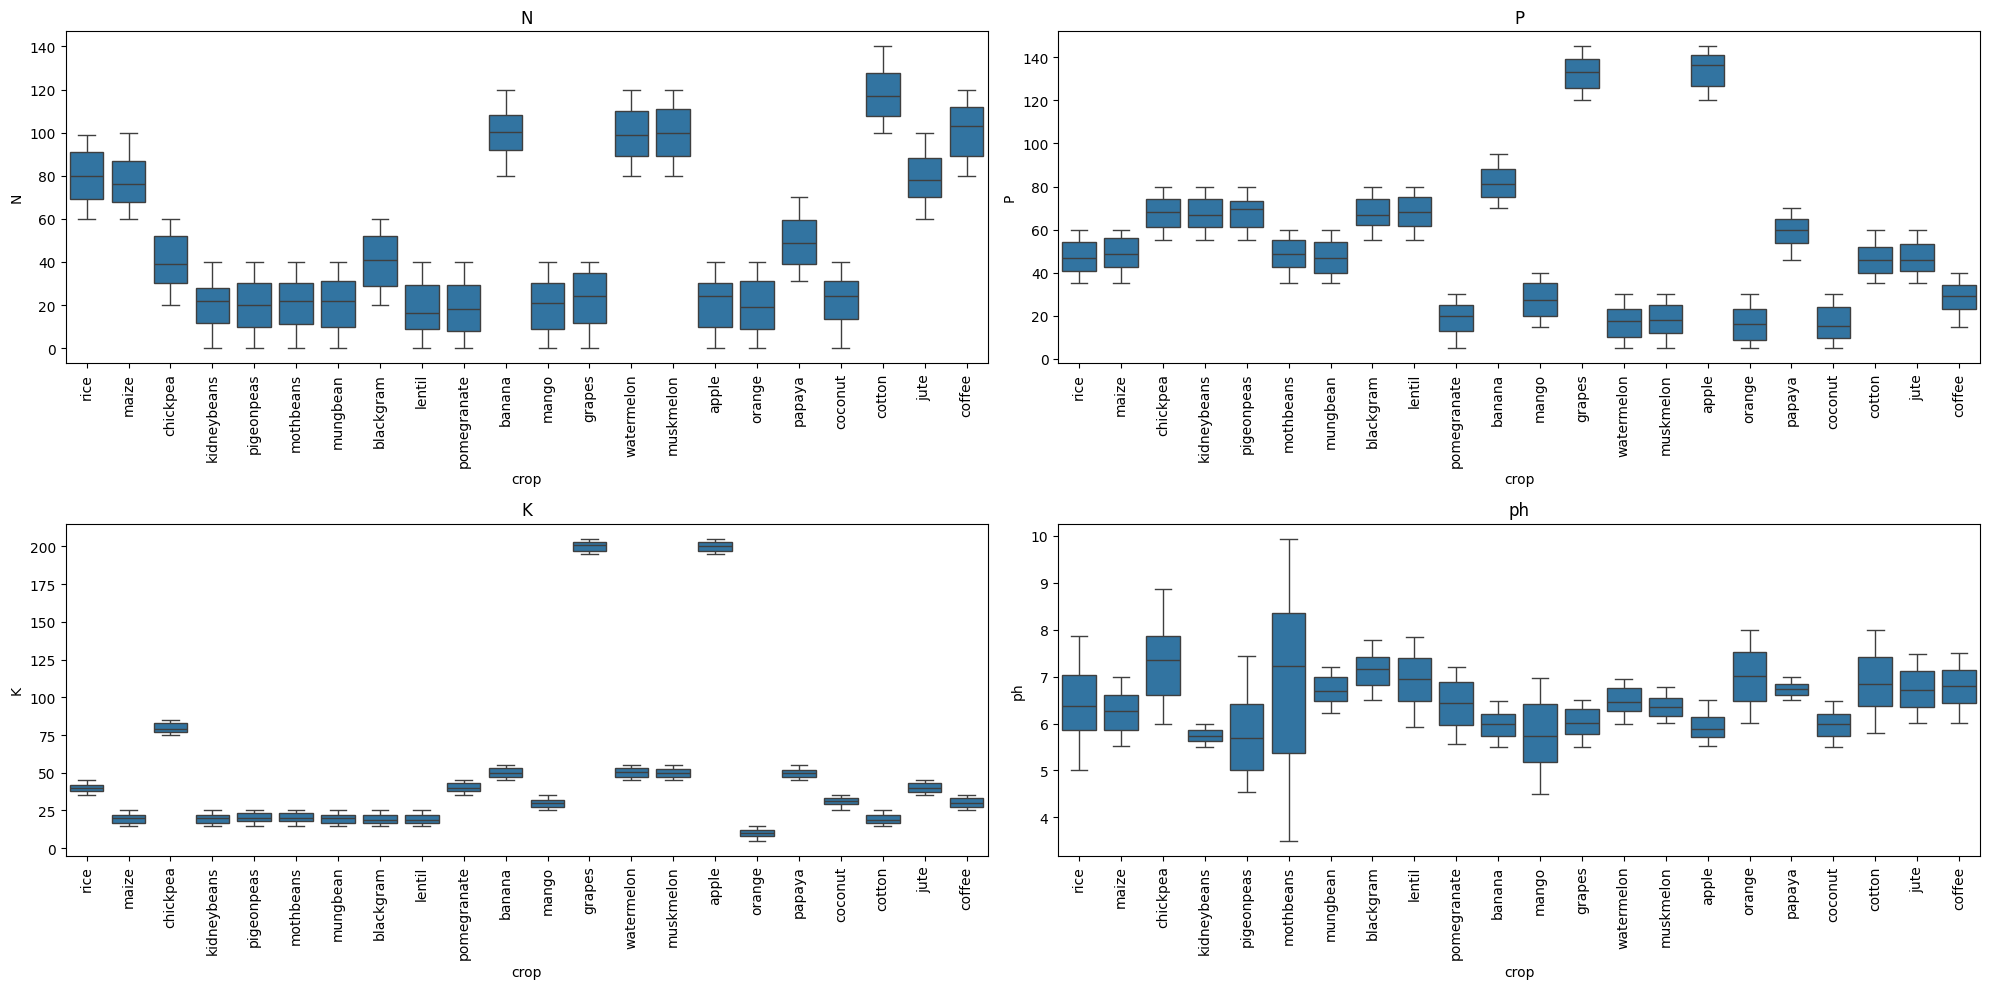

In [17]:
num_features = ['N', 'P', 'K', 'ph']

plt.figure(figsize=(20, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2,2, i)
    plot = sns.boxplot(x='crop', y=feature, data=crops)
    plt.setp(plot.get_xticklabels(), rotation=90)    
    plt.title(feature)
plt.tight_layout()
plt.show()

## Machine Learning 

Let's break down each section of your code to understand its functionality:

1. **Defining X and y**:
   - You're creating two datasets, `X` and `y`, from a dataframe named `crops`. `X` is obtained by dropping certain columns (specified in `columns_to_drop`), and `y` is a specific column named 'crop'.
   - This is typically done in machine learning to separate the features (`X`) from the target variable (`y`).

2. **Splitting the Dataset**:
   - You're using the `train_test_split` function to split your data into training and testing sets. This is a common practice in machine learning to evaluate the performance of a model.
   - The `test_size=0.2` parameter means 20% of the data is used for testing, and the rest for training.
   - `random_state=42` ensures the split is reproducible.
   - You're printing the shapes of the resulting datasets to verify the split.

3. **Univariate Modelisation**:
   - Here, you're iterating over a list of feature names (`features_names`), creating a logistic regression model (`log_reg`) for each, and evaluating its performance.
   - The logistic regression model is set up for a multinomial target variable and is given a high number of iterations to ensure convergence.
   - For each feature, you reshape `X_train` and `X_test` to include only that feature, fit the logistic regression model, and then predict on the test set.
   - The performance of each model is evaluated using the F1 score (weighted), which is a balanced measure for precision and recall, especially useful in multiclass classifications.

4. **Printing the Results**:
   - Finally, you print the F1 scores for each feature, allowing you to see which features are most predictive of the target variable individually.

In [8]:
# Define X and y
columns_to_drop = ["crop"]
X = crops.drop(columns_to_drop, axis=1)
y = crops["crop"]

# Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# univariate modelisation
features_names = ["N", "K", "ph", "P"]
log_reg = LogisticRegression(multi_class='multinomial', max_iter = 2000)
F1_score_results = []

for f in features_names:
    X_train_reshaped = X_train[[f]]
    X_test_reshaped = X_test[[f]]
    log_reg.fit(X_train_reshaped, y_train)
    y_pred = log_reg.predict(X_test_reshaped)    
    F1_score_results.append(f1_score(y_test, y_pred, average = 'weighted'))

for name, score in zip(features_names, F1_score_results):
    print(f'{name}: {score:.2f}')

(1760, 4) (1760,) (440, 4) (440,)


C:\Users\Menyssa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


N: 0.10
K: 0.22
ph: 0.05
P: 0.13


## Correlation Matrix 

Here's a breakdown of what each part of the code does:

1. **Calculating the Correlation Matrix**:
   - `correlation_matrix = crops.corr()`: This line computes the correlation matrix for the `crops` DataFrame. The `.corr()` method calculates the pairwise Pearson correlation coefficients between the columns/features of the DataFrame.

2. **Setting Up the Plotting Area**:
   - `plt.figure(figsize=(10, 8))`: This initializes a figure for your plot with a size of 10x8 inches.

3. **Creating a Heatmap of the Correlation Matrix**:
   - `sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2, linecolor='black')`: This line creates a heatmap using Seaborn.
     - `annot=True` displays the correlation values in the heatmap.
     - `cmap='coolwarm'` specifies the color palette. 'Coolwarm' is a good choice for correlation matrices as it clearly distinguishes positive (warm colors) from negative (cool colors) correlations.
     - `fmt='.2f'` formats the annotation to two decimal places.
     - `linewidths=2` and `linecolor='black'` enhance the grid lines for better readability.

4. **Adding a Title**:
   - `plt.title('Correlation Matrix')`: Sets the title of the heatmap.

5. **Displaying the Plot**:
   - `plt.show()`: Renders the figure with the heatmap.

The purpose of this visualization is to identify how strongly each pair of features is correlated. Correlation values range from -1 to 1, where 1 means a perfect positive correlation, -1 means a perfect negative correlation, and 0 means no correlation. This analysis is important in feature selection for machine learning models, as highly correlated features can lead to multicollinearity, which might affect the performance of some models.

If you have any specific questions or need further help with this analysis, feel free to ask!

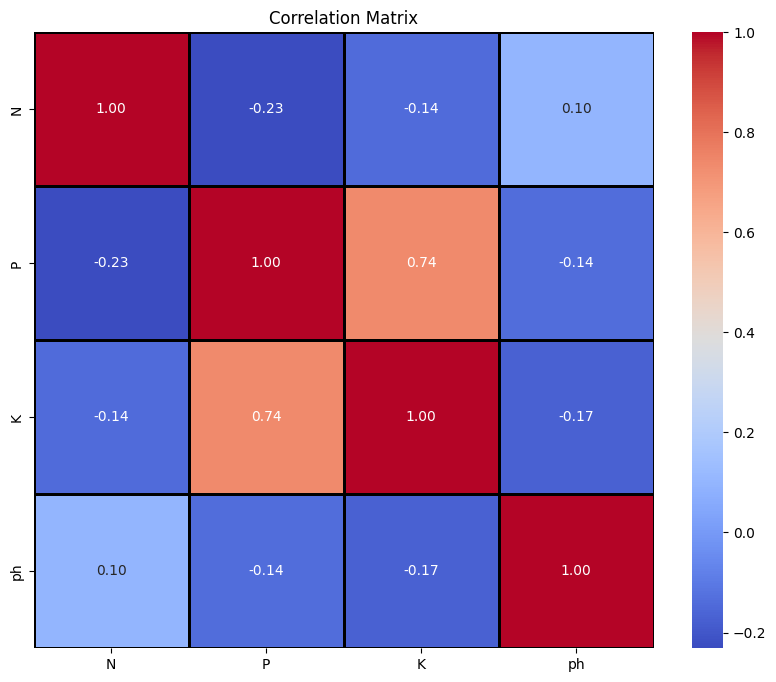

In [11]:
# Calculate the correlation matrix for the features in the dataset
correlation_matrix = crops.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

# Note: This cell identifies any strongly correlated features in the dataset

## Final multivariate logistic regression model 

Here's a breakdown of what each part of your code is doing:

1. **Defining Features and Target Variable**:
   - You define `final_features = ["N", "K", "ph"]`, which means you are selecting only these columns (presumably representing specific attributes like Nitrogen, Potassium, and pH levels) from your `crops` DataFrame as features.
   - `X = crops[final_features]` creates a new DataFrame `X` containing only your selected features.
   - `y = crops["crop"]` defines your target variable, which is the 'crop' column from the `crops` DataFrame.

2. **Splitting the Dataset**:
   - `train_test_split(X, y, test_size=0.2, random_state=42)` splits your data into training and testing sets. 20% of the data will be used for testing, and the rest for training. The `random_state` parameter is set for reproducibility of results.

3. **Training the Logistic Regression Model**:
   - `log_reg = LogisticRegression(multi_class='multinomial', max_iter=2000)`: This initializes a logistic regression model configured for a multinomial (more than two classes) target variable. The `max_iter=2000` parameter specifies the maximum number of iterations for the solver to use.
   - `log_reg.fit(X_train, y_train)`: This line fits (trains) the logistic regression model on the training data.

### Reminder: 
In logistic regression, the coefficients represent the change in the log-odds of the dependent variable for a one-unit change in the predictor variable. 

The `log-odds` are the logarithm of the odds, where the odds are the probability of the event occurring divided by the probability of the event not occurring:
The odds of an event are defined as the probability of the event occurring to the probability of it not occurring:

$$
\text{odds} = \frac{P(\text{event})}{1 - P(\text{event})}
$$

The log-odds are the logarithm of the odds:

$$
\text{log-odds} = \log(\text{odds})
$$

In a logistic regression model, the log-odds of the target being in a particular class are modeled as a linear combination of the input features:

$$
\text{log-odds} = b_0 + b_1x_1 + b_2x_2 + \ldots + b_nx_n
$$

Here, \( b_0 \) is the intercept, \( b_1 \) to \( b_n \) are the coefficients, and \( x_1 \) to \( x_n \) are the feature values.

When you exponentiate the log-odds (using the exponential function \( e \)), you obtain the odds:

$$
\text{odds} = e^{\text{log-odds}}
$$

To convert these odds to a probability, the following formula is used:

$$
P(\text{event}) = \frac{\text{odds}}{1 + \text{odds}}
$$

Thus, the coefficients tell you how a one-unit increase in a feature variable affects the log-odds of the outcome. If the coefficient is positive, the log-odds (and thus the probability) of the outcome increase with an increase in the feature's value. If the coefficient is negative, the log-odds (and probability) decrease with an increase in the feature's value.

4. **Making Predictions and Evaluating the Model**:
   - `y_pred = log_reg.predict(X_test)`: The model makes predictions on the test data.
   - `model_performance = f1_score(y_test, y_pred, average='weighted')`: This computes the weighted F1 score of the model. The F1 score is a measure of a test's accuracy and considers both the precision and the recall of the test to compute the score. The `average='weighted'` parameter calculates metrics for each label, and finds their average weighted by the number of true instances for each label.

5. **Printing the Performance**:
   - `print(f'{model_performance:.2f}')`: Finally, the performance score of the model is printed, formatted to two decimal places.

This code is a good example of a basic approach to training and evaluating a machine learning model in Python using scikit-learn. The choice of logistic regression and the F1 score metric is appropriate for classification problems, especially with multiple classes as in your case. If you have any specific questions about the code or if you need further assistance, feel free to ask!

In [19]:
# Define X and y
final_features = ["N", "K", "ph"]
X = crops[final_features]
y = crops["crop"]

# Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# multivariate modelisation
log_reg = LogisticRegression(multi_class='multinomial', max_iter = 2000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)    
model_performance = f1_score(y_test, y_pred, average = 'weighted')
print(f'{model_performance:.2f}')

0.57


C:\Users\Menyssa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Analyzing and interpreting the model's performance

These are the key steps for further analyzing and interpreting the performance of your logistic regression model used for crop classification based on soil properties. 

1. **Classification Report and Confusion Matrix**:
   - A classification report provides key metrics such as precision, recall, and F1-score for each class. The confusion matrix visually represents the correct and incorrect predictions.

2. **Feature Importances**:
   - In logistic regression, feature importances can be interpreted from the coefficients, indicating the impact of each feature on the prediction.

 3. **What Crops for Which Soil**:
   - This would involve analyzing the model to see which soil properties are favorable for different crops. You can examine the model's coefficients to understand which features are most influential for each crop.
   - Since logistic regression outputs probabilities, you can also use these to see which crops are most likely for a given set of soil conditions.

   ### Classification Report and Confusion Matrix

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       0.70      0.30      0.42        23
      banana       0.83      0.71      0.77        21
   blackgram       0.52      0.55      0.54        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.57      0.48      0.52        27
      coffee       0.71      0.88      0.79        17
      cotton       0.83      0.88      0.86        17
      grapes       0.41      0.79      0.54        14
        jute       0.52      0.57      0.54        23
 kidneybeans       0.36      0.65      0.46        20
      lentil       0.27      0.55      0.36        11
       maize       1.00      0.81      0.89        21
       mango       0.35      0.58      0.44        19
   mothbeans       0.36      0.21      0.26        24
    mungbean       0.56      0.26      0.36        19
   muskmelon       0.44      0.47      0.46        17
      orange       0.88      1.00      0.93        14
      papaya       0.76    

The classification report gives a detailed performance evaluation of your logistic regression model across multiple crop classifications. 

Each row corresponds to a different crop type, and the metrics provide insights into the model's performance for each class. Let's interpret the key metrics:

1. **Precision**: This metric indicates the accuracy of positive predictions. For example, for 'apple', a precision of 0.70 means that 70% of the instances predicted as 'apple' by the model were actually 'apple'.

2. **Recall**: This measures the ability of the model to find all the positive instances. For 'apple', a recall of 0.30 means the model correctly identified 30% of all actual 'apple' instances in the dataset.

3. **F1-Score**: This is the harmonic mean of precision and recall, providing a balance between them. It's particularly useful when the class distribution is imbalanced. For 'apple', an F1-score of 0.42 suggests a moderate balance between precision and recall.

4. **Support**: This indicates the actual number of instances of each class in the test dataset. For instance, there were 23 instances of 'apple'.

5. **Accuracy**: Overall accuracy (0.58 or 58%) of the model, which is the proportion of all predictions that were correct.

6. **Macro Average**: Averages each metric without considering the support. The macro average F1-score of 0.57 suggests that, on average, the model performs moderately across all classes.

7. **Weighted Average**: This takes the support of each class into account. A weighted average F1-score of 0.57 indicates a moderate overall performance, weighted by the number of instances in each class.

From this report, we can infer:

- The model performs very well for certain crops like 'chickpea' and 'orange' (high precision, recall, and F1-score).
- Performance is moderate for many crops, indicated by F1-scores in the range of 0.40-0.79 (e.g., 'banana', 'coffee', 'cotton').
- The model struggles with certain crops like 'mothbeans', 'pigeonpeas', and 'rice', shown by low F1-scores.
- There is a variance in the model's ability to correctly identify different crops, possibly due to the varying number of training samples for each class (as indicated by the 'support') or differences in feature distributions.
- Since the macro and weighted averages are relatively close (0.57), it suggests that the model is somewhat consistent across classes of varying sizes.


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Features importances

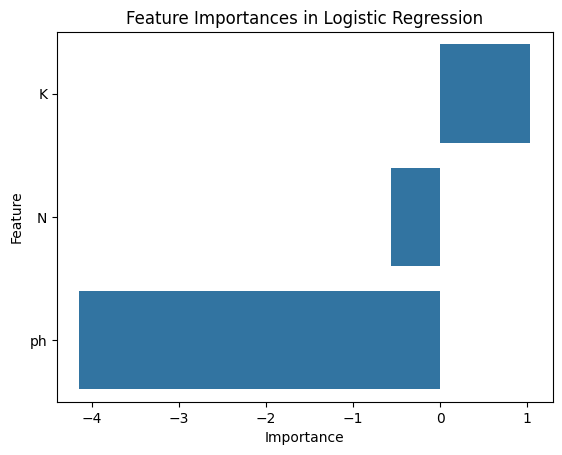

In [21]:
import pandas as pd

feature_importance = pd.DataFrame({'Feature': final_features, 'Importance': log_reg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importances in Logistic Regression')
plt.show()


The bar chart illustrates the feature importances as determined by a logistic regression model. Here's an interpretation of the chart:

1. **pH**: It has the most negative importance value, which suggests that as the pH value increases, the probability of the target variable (in this case, a particular crop) decreases. This is the most influential feature for the model's decisions.

2. **N (Nitrogen)**: This feature has a negative importance as well, but less so than pH. A higher nitrogen value might decrease the likelihood of the target crop, but the impact is not as strong as pH.

3. **K (Potassium)**: Potassium has a positive importance, albeit the smallest among the three. This indicates that higher potassium levels increase the probability of the target crop, according to the model's findings.

The magnitudes of these importance values are indicative of how much weight the logistic regression model gives to each feature when making predictions. The direction (positive or negative) indicates the nature of the relationship between the feature and the probability of the target class.

Remember, these feature importance values come from a logistic regression model that assumes a linear relationship between the features and the log-odds of the classes. This means that the actual impact on the probability of each class is not constant across the range of feature values but scales with the log-odds.

### What Crops for Which Soil? 
   - This would involve analyzing the model to see which soil properties are favorable for different crops. You can examine the model's coefficients to understand which features are most influential for each crop.
   - Since logistic regression outputs probabilities, you can also use these to see which crops are most likely for a given set of soil conditions.
   

In [26]:
# Retrieve the coefficient of the logistic regression model
coefficients = log_reg.coef_
features = final_features
classes = log_reg.classes_

coef_df = pd.DataFrame(coefficients, columns=features, index=classes)
print(coef_df)

                    N         K        ph
apple       -0.563907  1.035541 -4.138748
banana       0.274437  0.488176 -4.925897
blackgram    0.014917 -0.403528  3.824028
chickpea    -0.169805  0.918586 -2.524130
coconut     -0.137020  0.187887  1.083373
coffee       0.410329 -0.367797 -0.247940
cotton       0.606666 -1.202374 -0.697371
grapes      -0.546422  1.025258 -3.438622
jute         0.186687  0.085234 -0.309543
kidneybeans -0.115611 -0.337263  1.147559
lentil      -0.130174 -0.384780  3.579750
maize        0.363527 -0.802085 -0.576442
mango       -0.152018  0.177226  0.532174
mothbeans   -0.112492 -0.323000  3.826510
mungbean    -0.117225 -0.342641  3.226363
muskmelon    0.263648  0.422629 -2.853395
orange      -0.115670 -1.504909  4.621111
papaya      -0.077617  0.630487 -0.680669
pigeonpeas  -0.124078 -0.310458  1.292018
pomegranate -0.210822  0.540699  0.796913
rice         0.198216  0.091440 -1.571686
watermelon   0.254434  0.375670 -1.965358


The coefficients are from a logistic regression model that has been trained to classify different types of crops based on certain features.

In this context, the features are likely to be soil characteristics or nutrient concentrations important for crop growth, indicated as `N`, `K`, and `ph`.

Here's a basic interpretation of the coefficients:

- **Negative Coefficients**: A negative coefficient for a feature means that as the feature value increases, the log-odds of the crop being the correct classification decrease. For example, the coefficient for `ph` in predicting `apple` is -4.138748, which suggests that as the pH of the soil increases, the likelihood that the crop is an apple decreases significantly.

- **Positive Coefficients**: Conversely, a positive coefficient means that as the feature value increases, so does the log-odds of the crop being the correct classification. For instance, `apple` has a positive coefficient for `K` (1.035541), indicating that higher potassium levels in the soil increase the likelihood that the crop is an apple.

- **Magnitude of Coefficients**: The magnitude of these coefficients (how large or small they are) indicates the strength of the association between the feature and the crop classification. Larger absolute values mean a stronger relationship. For example, the coefficient for `ph` when predicting `orange` (4.621111) suggests a very strong relationship between pH levels and the likelihood that the crop is an orange.

For a more detailed interpretation, consider the following points for each crop:
- `apple`: Prefers lower pH levels, benefits from higher potassium (`K`).
- `banana`: Decreasing likelihood with increasing pH, but positively influenced by both `N` and `K`.
- `blackgram`: Strongly prefers higher pH levels, negatively affected by potassium.
- `chickpea`: Prefers moderate to lower pH levels, positively influenced by potassium.
- `coconut`: Likes slightly higher pH levels, with minor influence from `N` and `K`.
- `coffee`: Prefers moderate pH, negatively influenced by potassium.
- ... and so on for each crop.

It's important to remember that these coefficients should be interpreted within the context of the model and the data. The effect of a unit change in a feature depends on the distribution and scale of the feature itself. Moreover, these are linear relationships in the log-odds space, and the actual effect on the probability of each class is non-linear, affected by the sigmoid transformation in logistic regression.

In practice, this information can be used to make informed decisions about crop selection based on soil conditions, or to guide soil treatment to become suitable for a desired crop.

## Predicting the crop for a specific soil condition

For example, let's assume we have the following soil properties:

- Nitrogen (N): 20
- Potassium (K): 10
- pH level: 6.5

In [27]:
# Define the sample soil conditions
sample_soil_condition = pd.DataFrame([{'N': 20, 'K': 10, 'ph': 6.5}])

# Use the logistic regression model to predict the crop
predicted_crop = log_reg.predict(sample_soil_condition)

# Output the recommended crop
print("Recommended crop:", predicted_crop[0])

Recommended crop: orange


## Conclusion 

It seems that according to the model, the combination of 20 units of Nitrogen, 10 units of Potassium, and a pH level of 6.5 creates conditions that are favorable for growing oranges. 

Remember, this prediction is based solely on the model and the data it was trained on. 

Actual crop suitability can be influenced by many other factors, including climate, water availability, soil type, and more, which are not considered in this model.
